# Loading libraries

In [131]:
import pandas as pd 
import re # Regular Expressions - useful for extracting information from text 
import seaborn as sns
from sklearn import tree

# Read and separate data

In [133]:
df_class=pd.read_csv('data/job_emails.csv')
df_class.drop('Unnamed: 0',inplace=True, axis=1)
df_class.shape

(421, 2)

In [136]:
df_class1=pd.read_csv('data/job_emails1.csv')
# df_class.drop('Unnamed: 0',inplace=True, axis=1)
df_class1.shape

(421, 5)

In [137]:
df_class1.head()

,index,Content,source,label1,label2
0,0,"Ginko The company\n\nAt Ginko, we are Digital ...",indeed,job_opp,data_engineer
1,1,Nexity Company Description\n\n1st platform of ...,indeed,job_opp,data_engineer
2,2,"42c Who are we ?\nIn agile mode, we provide an...",indeed,job_opp,data_engineer
3,3,"RS2i Who are we ?\nAt RS2i, we are committed t...",indeed,job_opp,data_engineer
4,4,McKinsey & Company Who You'll Work With\nBased...,indeed,job_opp,data_engineer


In [145]:
df_class.isnull().sum()

index        0
Content      0
source       0
label1     150
label2     239
dtype: int64

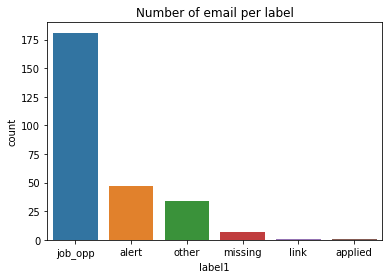

In [138]:
ax = sns.countplot(x="label1", data=df_class)
plt.title("Number of email per label")
plt.show()

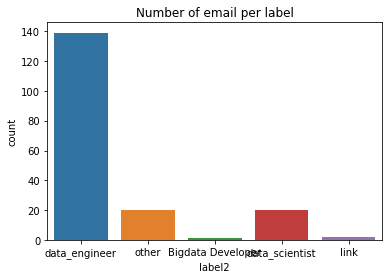

In [139]:
ax = sns.countplot(x="label2", data=df_class1)
plt.title("Number of email per label")
plt.show()

In [141]:
df_class1['source'].unique()

array(['indeed', 'kaggle', 'assan'], dtype=object)

In [142]:
df_class1['label1'].unique()

array(['job_opp', nan, 'alert', 'other', 'missing', 'link', 'applied'],
      dtype=object)

In [143]:
df_class1['label2'].unique()

array(['data_engineer', nan, 'other', 'Bigdata Developer',
       'data_scientist', 'link'], dtype=object)

In [30]:
Kaggle_job = df_class[df_class['Label']== 'kaggle']
Kaggle_job.reset_index(inplace=True)
Kaggle_job.shape

(150, 3)

In [31]:
indeed_job = df_class[df_class['Label']== 'indeed']
indeed_job.shape

(131, 2)

In [32]:
assan_job = df_class[df_class['Label']== 'assan']
assan_job.reset_index(inplace=True)
assan_job.shape

(140, 3)

In [33]:
Kaggle_job.shape[0]+assan_job.shape[0]+indeed_job.shape[0]

421

# Process data from Assan

In [34]:
def process_emails_type(data):
    data = data.lower()
    if re.search('alert', data) ==None:
        if re.search('job description', data) ==None:
            data = 'others'
        else:
            data = 'job_description'
    else:
        data = 'alert'
    return data

In [35]:
assan_job['label'] = assan_job['Content'].apply(process_emails_type)

In [36]:
assan_job['label'].unique()

array(['alert', 'others', 'job_description'], dtype=object)

In [37]:
assan_job[assan_job['label']=='job_description'].shape[0] +assan_job[assan_job['label']=='alert'].shape[0]+ assan_job[assan_job['label']=='others'].shape[0]

140

In [38]:
def process_emails_job_title(data):
    data = data.lower()
    if re.search('data engineer', data) ==None:
        if re.search('data scientist', data) ==None:
            if re.search('data analyst', data) ==None:
                data = 'other_job'
            else:
                data = 'data_analyst'
        else:
            data = 'data_scientist'
    else:
        data = 'data_engineer'
    return data

In [39]:
assan_job['job_title'] = assan_job['Content'].apply(process_emails_job_title)

In [40]:
assan_job['job_title'].unique()

array(['data_engineer', 'other_job', 'data_scientist'], dtype=object)

In [41]:
assan_job = assan_job[["Content","label","job_title"]]
assan_job.head()

,Content,label,job_title
0,"8/24/22, 7:05 PM\n\nGmail - Trulioo is hiring ...",alert,data_engineer
1,Subject: Job Opening: Sr. Data Engineer with G...,others,data_engineer
2,Subject: Eurofins USA BioPharma Services is hi...,alert,other_job
3,Subject: Position: Applications Architect | IT...,others,other_job
4,"8/24/22, 7:14 PM\n\nGmail - Optum is hiring fo...",alert,data_engineer


In [50]:
not_classified = assan_job[(assan_job['label']=='others')&(assan_job['job_title']!='other_job')].reset_index()

In [51]:
not_classified.shape

(29, 4)

In [58]:
not_classified['Content'][3]

"Subject: Job opportunity for R developer/ Data Scientist - Merck\nFrom: Gitika Sinha <inmail-hit-reply@linkedin.com>\nTo: Assan SANOGO <assansanogo@gmail.com>\nDate Sent: Friday, April 15, 2022 9:26:19 AM GMT-07:00\nDate Received: Friday, April 15, 2022 9:26:21 AM GMT-07:00\n\nJob type: 12 months contract (extension possible) \n• Strong knowledge in R package development and unit testing\n• Familiar with survival analysis and related R packages (survival, flexsurv etc)\n• Familiar with Real World Data data is a plus.\n• Explore and expand the usages of RWD to align RWE generation with drug discovery and development,\nclinical, commercial, and regulatory needs\n• Work with project leadership to define the scope and approach of new use cases and applications\n• Design and execute real world analyses to either test hypotheses or generate new hypotheses. Conduct issue\nanalysis, synthesize findings, interpret results in the context of product/market/industry dynamics, develop\nrecommendat

# Process data from kaggle and 

### Data from kaggle

In [15]:
def label_data(label):
    label = label.lower()
    if label =='indeed':
        label = 'job_description'
    elif label == 'kaggle':
        label = 'others'
    else:
        label = 'alert'
    return (label)

In [16]:
Kaggle_job['label'] = Kaggle_job.Label.apply(label_data)

In [17]:
# Since we knoow that data from kaggle are not job description or alert
Kaggle_job['job_title'] = 'other_job'

In [18]:
print(Kaggle_job['label'].unique(), Kaggle_job['job_title'].unique())

['others'] ['other_job']


In [19]:
Kaggle_job = Kaggle_job[["Content","label","job_title"]]
Kaggle_job.head()

,Content,label,job_title
0,Message-ID: <18782981.1075855378110.JavaMail.e...,others,other_job
1,Message-ID: <15464986.1075855378456.JavaMail.e...,others,other_job
2,Message-ID: <24216240.1075855687451.JavaMail.e...,others,other_job
3,Message-ID: <13505866.1075863688222.JavaMail.e...,others,other_job
4,Message-ID: <30922949.1075863688243.JavaMail.e...,others,other_job


### Data from indeed(web scaping)

In [20]:
indeed_job['label'] = indeed_job.Label.apply(label_data)

In [21]:
# Since we knoow that data from indeed are data engineer job description
indeed_job['job_title'] = 'data_engineer'

In [22]:
print(indeed_job['label'].unique(), indeed_job['job_title'].unique())

['job_description'] ['data_engineer']


In [23]:
indeed_job = indeed_job[["Content","label","job_title"]]
indeed_job.head()

,Content,label,job_title
0,"Ginko The company\n\nAt Ginko, we are Digital ...",job_description,data_engineer
1,Nexity Company Description\n\n1st platform of ...,job_description,data_engineer
2,"42c Who are we ?\nIn agile mode, we provide an...",job_description,data_engineer
3,"RS2i Who are we ?\nAt RS2i, we are committed t...",job_description,data_engineer
4,McKinsey & Company Who You'll Work With\nBased...,job_description,data_engineer


# Concatenate processed data

In [24]:
indeed_Kaggle_job = pd.concat([indeed_job, Kaggle_job], axis=0)
indeed_Kaggle_job.head()

,Content,label,job_title
0,"Ginko The company\n\nAt Ginko, we are Digital ...",job_description,data_engineer
1,Nexity Company Description\n\n1st platform of ...,job_description,data_engineer
2,"42c Who are we ?\nIn agile mode, we provide an...",job_description,data_engineer
3,"RS2i Who are we ?\nAt RS2i, we are committed t...",job_description,data_engineer
4,McKinsey & Company Who You'll Work With\nBased...,job_description,data_engineer


In [25]:
all_data = pd.concat([assan_job,indeed_Kaggle_job], axis=0)
all_data.head()

,Content,label,job_title
0,"8/24/22, 7:05 PM\n\nGmail - Trulioo is hiring ...",alert,data_engineer
1,Subject: Job Opening: Sr. Data Engineer with G...,others,data_engineer
2,Subject: Eurofins USA BioPharma Services is hi...,alert,other_job
3,Subject: Position: Applications Architect | IT...,others,other_job
4,"8/24/22, 7:14 PM\n\nGmail - Optum is hiring fo...",alert,data_engineer


In [26]:
print(df_class.shape,all_data.shape)

(421, 2) (421, 3)


In [27]:
all_data.to_csv("labeled_emails.csv",index=False)

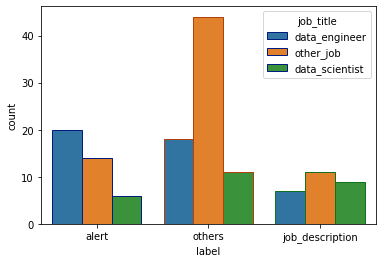

In [65]:
ax = sns.countplot(x="label", hue ='job_title' ,data=assan_job, edgecolor=sns.color_palette("dark", 3))
plt.show()

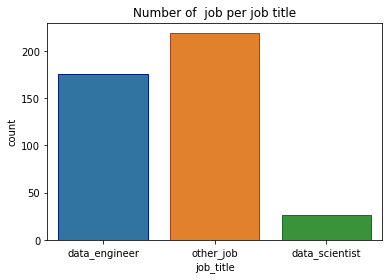

In [70]:
ax = sns.countplot(x="job_title", data=all_data, edgecolor=sns.color_palette("dark", 3))
plt.title("Number of job per job title")
plt.show()

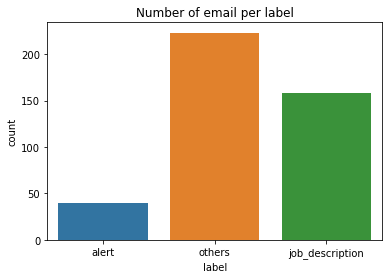

In [71]:
ax = sns.countplot(x="label", data=all_data)
plt.title("Number of email per label")
plt.show()

In [73]:
import pandas as pd

# For the Stop Words
from nltk.corpus import stopwords

# Convert the Words into Count Vectpr 
from sklearn.feature_extraction.text import CountVectorizer

# Used to Pipe line 
from sklearn.feature_extraction.text import TfidfTransformer

# Train Test Split
from sklearn.model_selection import train_test_split

# Model 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression,LinearRegression

# For Report 
from sklearn.metrics import confusion_matrix, classification_report


In [110]:
job_description = all_data[all_data['label']== 'job_description']
job_description.shape

(158, 3)

In [118]:
# X_Data = job_description["Content"]
# Y_Data = job_description["job_title"]
X_Data = all_data["Content"]
Y_Data = all_data["job_title"]

cv = CountVectorizer()
X_Data = cv.fit_transform(X_Data)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data,test_size=0.3,random_state=101)
# model = MultinomialNB()
model = tree.DecisionTreeClassifier()
model.fit(X_Train,Y_Train)
predicted = model.predict(X_Test)
print(classification_report(Y_Test, predicted))

                precision    recall  f1-score   support

 data_engineer       0.91      0.81      0.85        62
data_scientist       0.33      0.43      0.38         7
     other_job       0.90      0.98      0.94        58

      accuracy                           0.87       127
     macro avg       0.72      0.74      0.72       127
  weighted avg       0.88      0.87      0.87       127



In [116]:
# print(predicted_value)

# tree.plot_tree(model)

In [128]:
X_Valid =assan_job["Content"]
Y_Valid =assan_job["job_title"]
X_Valid =cv.fit_transform(X_Valid)
X_Valid

<140x5876 sparse matrix of type '<class 'numpy.int64'>'
	with 29785 stored elements in Compressed Sparse Row format>

In [129]:
X_Test

<127x10230 sparse matrix of type '<class 'numpy.int64'>'
	with 25209 stored elements in Compressed Sparse Row format>

In [130]:
Y_Valid_predicted = model.predict(X_Valid)
print(classification_report(Y_Valid, Y_Valid_predicted))

ValueError: X has 5876 features, but DecisionTreeClassifier is expecting 10230 features as input.

https://github.com/soumilshah1995/NLP-Model-and-Data-Analysis-on-YELP-Dataset/blob/master/NLP%20Model%20on%20YELP%20Data%20Set.ipynb